# W1M1 - mtcars 데이터셋 분석하기
---

> 학습 목표
>> mtcars 데이터셋을 분석하고 그래프를 그리는 방법을 배웁니다.
>> 1.  Jupyter notebook의 기본 사용법을 배웁니다.
>> 2. pandas의 DataFrame의 기본 사용법을 배웁니다.
>> 3. matplotlib로 그래프를 그리는 방법을 배웁니다.


> 사전지식
>> 데이터셋의 features에 대한 설명은 다음과 같습니다.
>> 1. mpg = Miles/(US) gallon
>> 2. cyl = Number of cylinders
>> 3. disp = Displacement (cu.in.)
>> 4. hp = Gross horsepower
>> 5. drat = Rear axle ratio
>> 6. wt = Weight (lb/1000)
>> 7. qsec = ¼ mile time
>> 8. vs = V/S
>> 9. am = Transmission (0 = automatic, 1 = manual)
>> 10. gear = Number of forward gears
>> 11. carb = Number of carburetors

> 프로그래밍 요구사항
>> 1. 데이터는 pandas 라이브러리의 DataFrame을 이용해서 처리합니다.
>> 2. 기능적 요구사항을 수행할 때는 가급적 numpy는 사용하지 마세요.  
>> 3. 그래프는 matplotlib 라이브러리를 이용하세요. (필요한 경우, 다른 라이브러리를 사용해도 됩니다.)

---


## DataFrame methods을 사용해서 데이터셋의 결과를 출력

In [160]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("./mtcars.csv")

print("Head")
print(data.head(), "\n")


Head
          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2   



In [161]:
print("Tail")
print(data.tail())

Tail
        Unnamed: 0   mpg  cyl   disp   hp  drat     wt  qsec  vs  am  gear  \
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.9   1   1     5   
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.6   1   1     4   

    carb  
27     2  
28     4  
29     6  
30     8  
31     2  


In [162]:
print("Shape of Method")
print(data.shape[0])

Shape of Method
32


In [163]:
print("Shape of Method")
print(data.shape[1])

Shape of Method
12


In [164]:
print("Columns:")
print(data.columns)

Columns:
Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


In [165]:
unnamed_columns = [col for col in data.columns if 'Unnamed' in col or col.strip() == '']
print(unnamed_columns)

data.rename(columns={'Unnamed: 0': 'Car name'}, inplace=True)
print(data.columns)

['Unnamed: 0']
Index(['Car name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


In [166]:
print("Info")
print(data.info())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car name  32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     int64  
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  gear      32 non-null     int64  
 11  carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


In [167]:
print("Data types")
print(data.dtypes)

Data types
Car name     object
mpg         float64
cyl           int64
disp        float64
hp            int64
drat        float64
wt          float64
qsec        float64
vs            int64
am            int64
gear          int64
carb          int64
dtype: object


In [168]:
print("Statistical summary of the dataset:")
print(data.describe(), "\n")

Statistical summary of the dataset:
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.00000

In [169]:
print(data.describe(include='all'), "\n")

         Car name        mpg        cyl        disp          hp       drat  \
count          32  32.000000  32.000000   32.000000   32.000000  32.000000   
unique         32        NaN        NaN         NaN         NaN        NaN   
top     Mazda RX4        NaN        NaN         NaN         NaN        NaN   
freq            1        NaN        NaN         NaN         NaN        NaN   
mean          NaN  20.090625   6.187500  230.721875  146.687500   3.596563   
std           NaN   6.026948   1.785922  123.938694   68.562868   0.534679   
min           NaN  10.400000   4.000000   71.100000   52.000000   2.760000   
25%           NaN  15.425000   4.000000  120.825000   96.500000   3.080000   
50%           NaN  19.200000   6.000000  196.300000  123.000000   3.695000   
75%           NaN  22.800000   8.000000  326.000000  180.000000   3.920000   
max           NaN  33.900000   8.000000  472.000000  335.000000   4.930000   

               wt       qsec         vs         am       gear  

---

# gear, transmission features에는 각각 몇가지 값이 있는지를 출력하기

In [170]:
print("gear 고유값 개수")
print(data['gear'].nunique())
print(data['gear'].unique())

print("transmission 고유값 개수")
print(data['am'].nunique())
print(data['am'].unique())



gear 고유값 개수
3
[4 3 5]
transmission 고유값 개수
2
[1 0]


In [171]:
# cross tab 사용
crosstab_result = pd.crosstab(data['gear'], data['am'])
print(crosstab_result)


crosstab_result = pd.crosstab(data['gear'], data['am'], rownames=['gear'], colnames=['transmission'])
print(crosstab_result)

am     0  1
gear       
3     15  0
4      4  8
5      0  5
transmission   0  1
gear               
3             15  0
4              4  8
5              0  5


In [172]:
# cross tab 사용 X
# 조합별 차량 수 계산
grouped_result = data.groupby(['gear', 'am']).size().reset_index(name='count')
print(grouped_result)

   gear  am  count
0     3   0     15
1     4   0      4
2     4   1      8
3     5   1      5


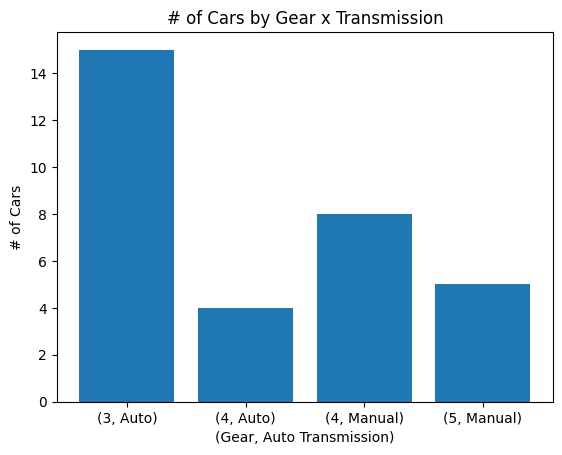

In [173]:
grouped_result = data.groupby(['gear', 'am']).size().reset_index(name='count')

grouped_result['Transmission'] = grouped_result['am'].map({0: 'Auto', 1: 'Manual'})

plt.bar(
    x=[f"({row.gear}, {row.Transmission})" for row in grouped_result.itertuples()],
    height=grouped_result['count'],
)

plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")
plt.show()

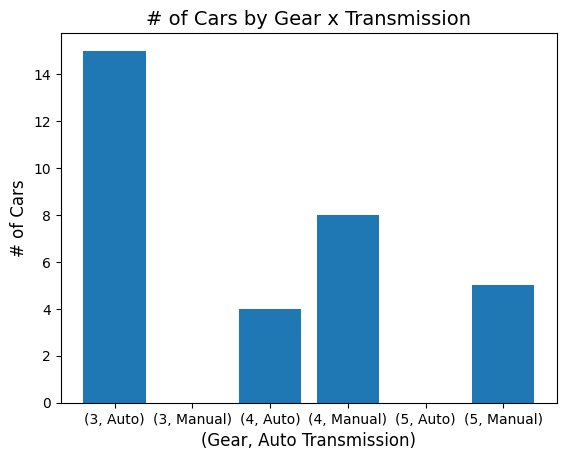

In [174]:
# crosstab 계산
crosstab_result = pd.crosstab(data['gear'], data['am'], rownames=['gear'], colnames=['transmission'])

# crosstab 결과 변환
crosstab_flat = crosstab_result.stack().reset_index(name='count')
crosstab_flat['combination'] = crosstab_flat.apply(
    lambda row: f"({row['gear']}, {'Auto' if row['transmission'] == 0 else 'Manual'})", axis=1
)

# 바 그래프 생성
# plt.figure(figsize=(10, 6))
plt.bar(crosstab_flat['combination'], crosstab_flat['count'])

# 타이틀과 축 레이블 설정
plt.title('# of Cars by Gear x Transmission', fontsize=14)
plt.xlabel('(Gear, Auto Transmission)', fontsize=12)
plt.ylabel('# of Cars', fontsize=12)

# 그래프 출력
plt.show()

---

# 모든 features의 히스토그램 그리기

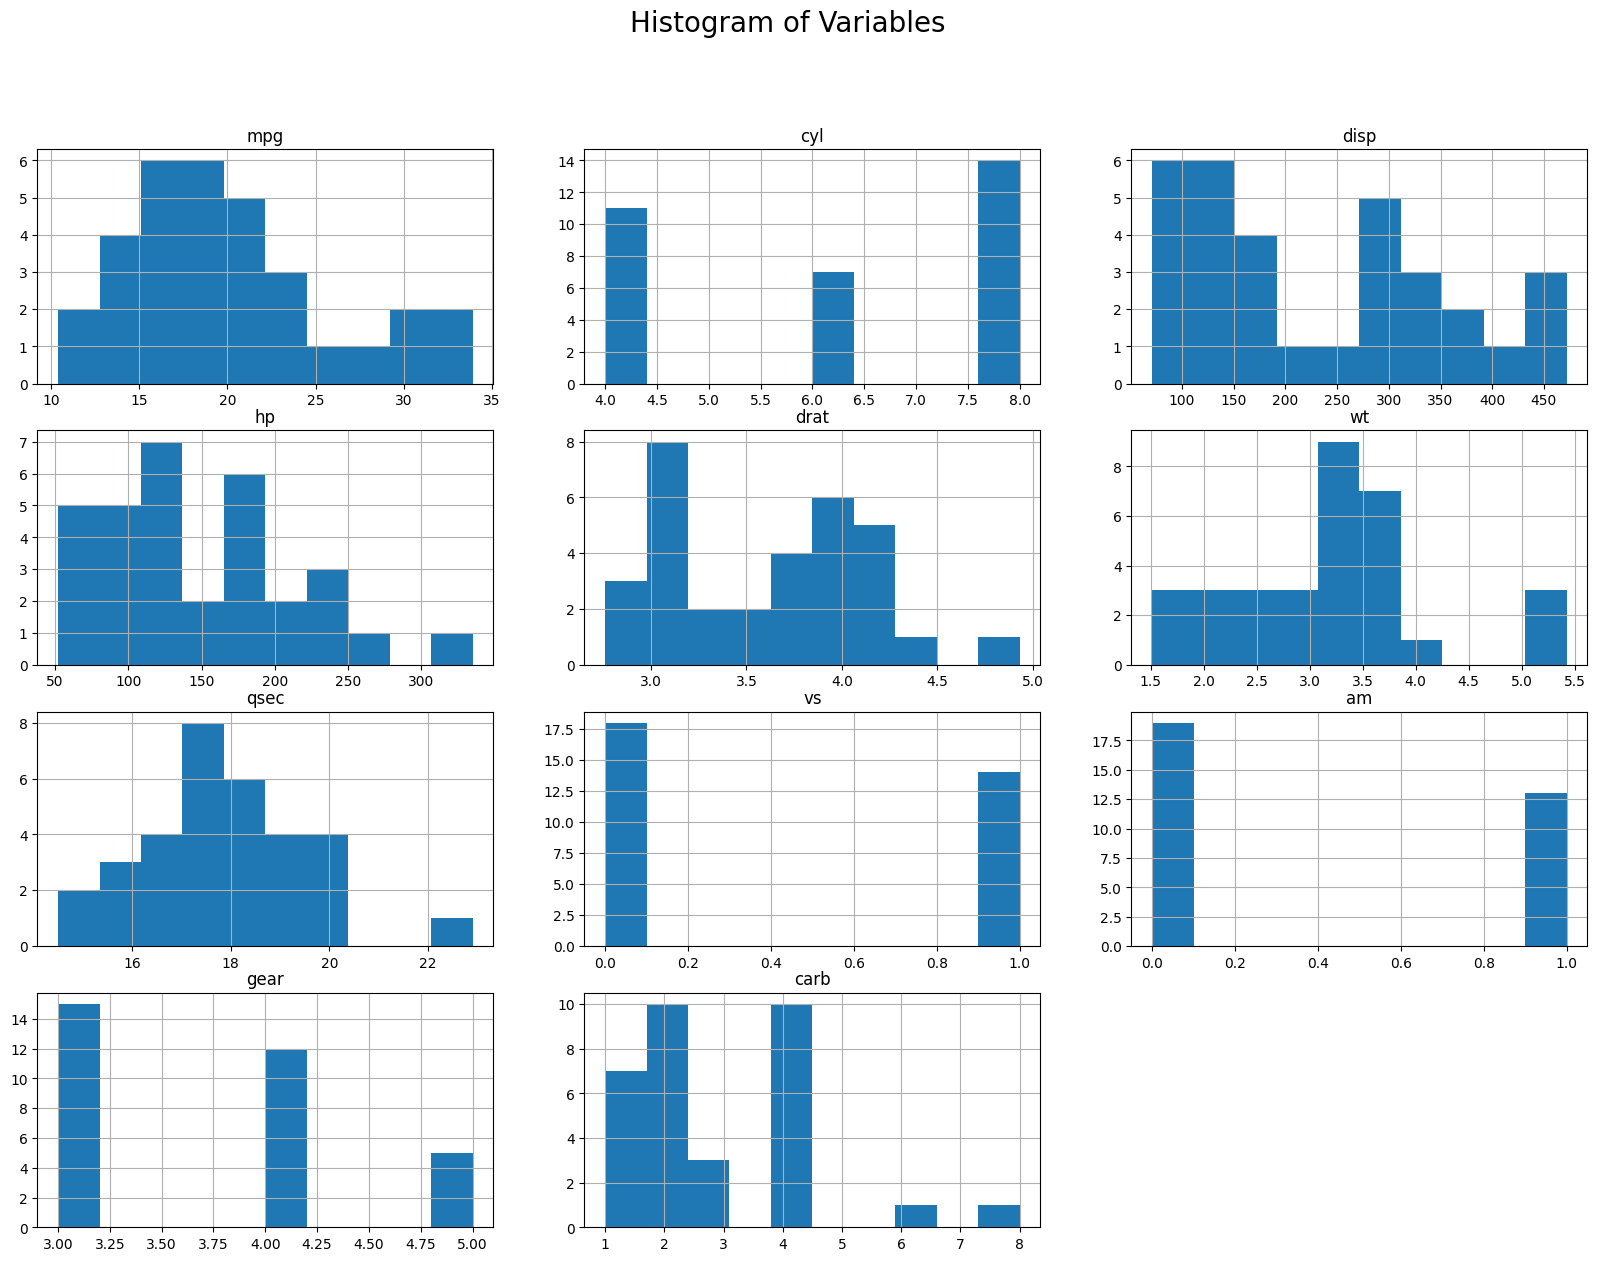

In [175]:
plt.figure(figsize=(20, 14))
show_columns = [col for col in data.columns if col != 'Car name']
plt.suptitle('Histogram of Variables', fontsize=20)
for i, col in enumerate(show_columns):
    plt.subplot(4, 3, i+1)
    data[col].hist()
    plt.title(col)
    

# fig, axs = plt.subplots(4, 3, figsize=(8, 8))

# for i, column in enumerate(data.columns[1:]):
#     ax = axs[i//3, i%3]
#     ax.hist(data[column])
#     ax.set_title(column)
#     ax.grid(True)

# fig.delaxes(axs[3, 2])

---

# Cylinder와 HorsePower 간의 상관 관계 Scatter 차트

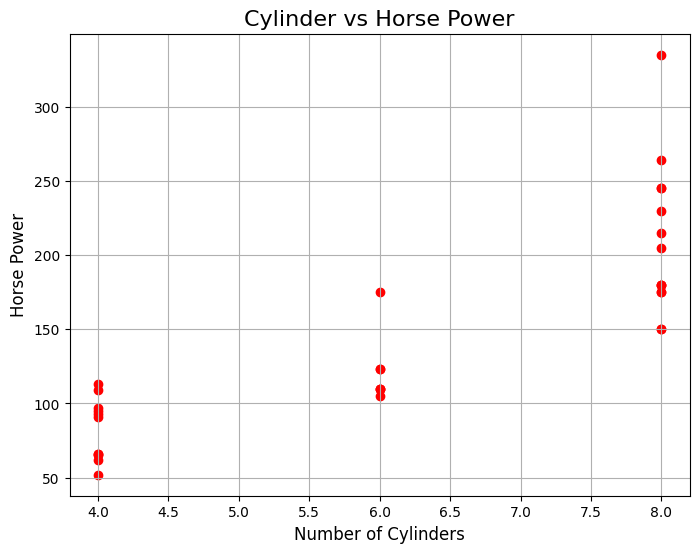

In [176]:
# Scatter plot 생성
plt.figure(figsize=(8, 6))
plt.scatter(data['cyl'], data['hp'], color='red')

# 그래프 타이틀 및 축 레이블 설정
plt.title("Cylinder vs Horse Power", fontsize=16)
plt.xlabel("Number of Cylinders", fontsize=12)
plt.ylabel("Horse Power", fontsize=12)

# 그래프 표시
plt.grid(True)
plt.show()

# MPG와 HorsePower 간의 상관 관계 Scatter 차트

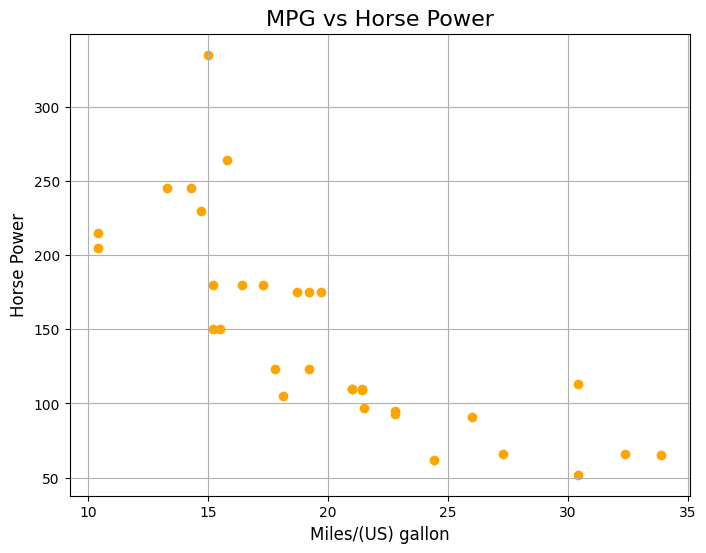

In [177]:
plt.figure(figsize=(8, 6))
plt.scatter(data['mpg'], data['hp'], color = 'orange')

plt.title("MPG vs Horse Power", fontsize=16)
plt.xlabel("Miles/(US) gallon", fontsize=12 )
plt.ylabel("Horse Power", fontsize=12)

plt.grid(True)
plt.show()

---

# 변수들 간의 상관 관계를 알아 보기 위해 상관계수

In [179]:
# 숫자형 데이터만 선택
numeric_data = data.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_data.corr()

# 상관계수 표 출력
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      car

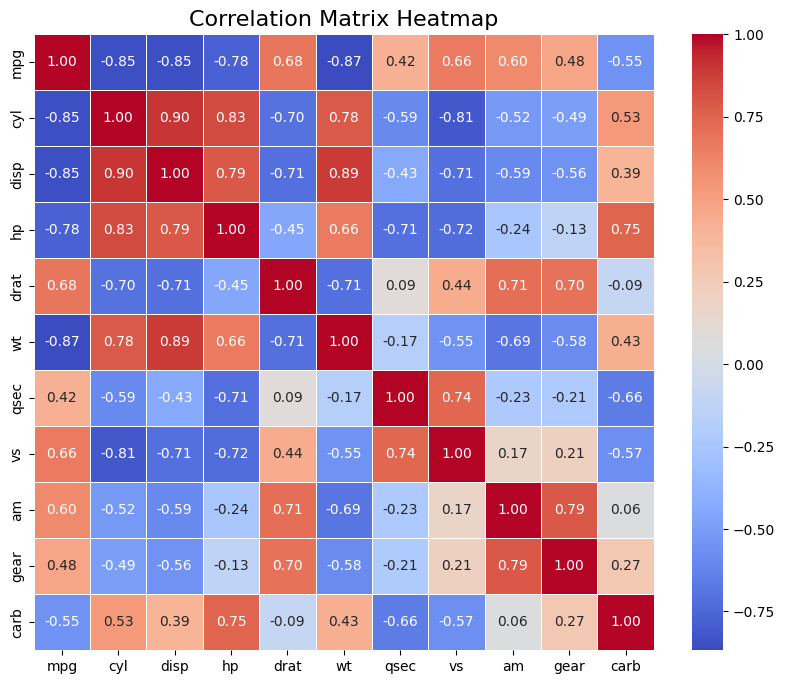

In [183]:
import seaborn as sns

# 상관계수 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 그래프 제목 설정
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [181]:
data[show_columns].corr()   

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


---

# 팀 활동 요구사항

#### - 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?
#### - 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

1. 현대 자동차 입장에서 얻을 수 있는 경제적 가치에 집중해서 생각을 해보았다.
    - 고연비 차량 설계나 생산이 가능
      연비(MPG)와 차량 무게(WT), 마력(HP) 간의 상관 관계를 분석하여 경량화된 고연비 차량 설계 가능할 것 같았다. 이를 통하여 환경규제 대응 및 연료비 절감 차량의 수요 증가로 시장 점유율 확대 가능할 것이라고 생각했다.

    -	레이싱 및 고성능 차량 개발
      최근 국내에도 인기가 높아진 만큼, 전세계적으로 레이싱에 관한 인기가 높아짐을 체감했다. 이에 따라 나는 마력(HP), 가속력(QSEC), 차량 무게(WT) 간 상관 관계 분석하여 레이싱 및 고성능 차량을 위한 최적 설계. 고성능 모델은 브랜드 이미지 제고와 고가 시장 공략에 유리할 것이라 생각을 해보았다.

    - 마케팅 전략 최적화
      데이터 활용를 활용함으로써 소비자 선호 데이터와 차량 사양(마력, 연비 등) 간 관계를 분석하여, 소비자가 선호하는 차량 특성을 기반으로 맞춤형 마케팅 전략 수립하여 경제적으로 활용 가능할 것 같았다.
  
  2. 개인적으로 관심이 많았던 '자동차 레이싱'에 접목을 해서 생각을 해보았다. 그리하여 내가 선택한 변수는,
      1. 마력 (hp)와 차량 무게 (wt):
        - 레이싱에서 차량 무게와 마력 간의 균형은 가속력과 주행 성능에 직접적인 영향을 미침
        (가설: 경량화된 고마력 차량이 레이싱 성능에 유리)

      2. 마력 (hp)와 가속력 (qsec):
        - 레이싱에서 마력 증가가 얼마나 가속력을 개선할 수 있는지 확인 가능
        (가설: 마력이 높을수록 가속 시간이 줄어들 가능성)

      **결과해석**


      1. 마력과 차량 무게
      그래프에서 마력(HP)이 증가할수록 차량 무게(WT)가 증가하는 경향이 나타날 수 있다. 고마력 차량은 대개 고성능 엔진과 강력한 구조를 필요로 하므로 더 무겁다. 레이싱에서는 고마력 차량을 경량화하기 위해 자체 기술 개발과 마력 대비 무게가 낮은 차량들의 엔진을 벤치마킹 하는 듯의 방항으로 연구를 진행하면 성능을 극대화할 수 있을 것 같다.

      2. 마력과 가속력
      그래프에서 마력(HP)이 높아질수록 가속 시간(QSEC)이 줄어드는 경향이 확인될 수 있다. 마력을 증가시키면 가속력이 개선되므로, 레이싱 차량에서는 고마력을 기반으로 엔진 성능을 최적화하는 것이 중요할 것 같다.

      *결론*  
      - 경량화된 고마력 차량이 레이싱 성능에 유리:
      무게를 줄이면서 마력을 높이는 설계는 레이싱에서 가속력과 속도를 크게 향상.
      소재 변경 (카본)이나 공기 역학(다운스트림) 등을 통해 경량화를 달성할 수 있음.

      - 가속력 향상을 위한 엔진 튜닝:
      마력과 가속력 간의 관계를 최적화하여 레이싱 차량의 출력 성능 극대화 필요
      고성능 엔진 설계와 효율적인 기어비율 조정이 필요.


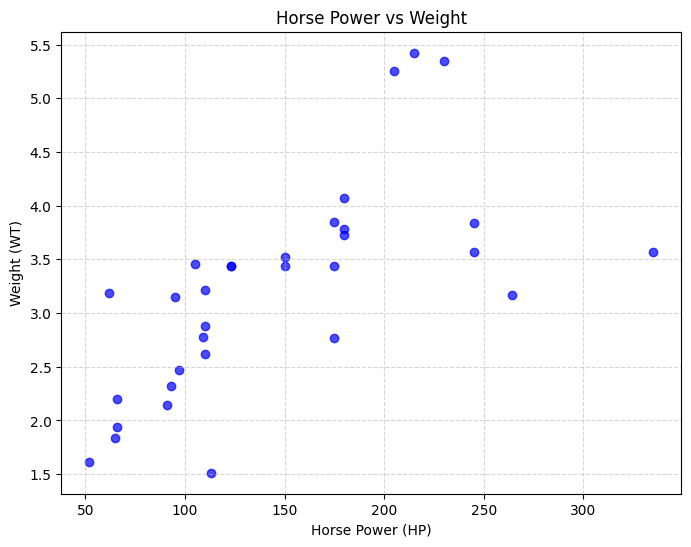

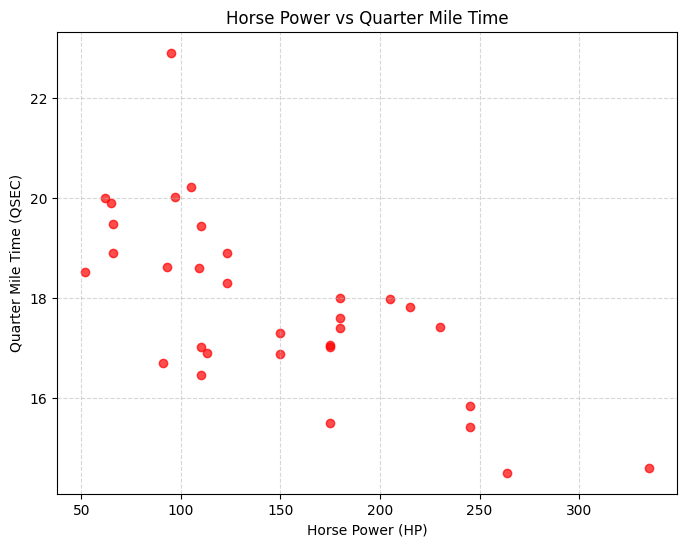

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 로드
url = "https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/main/missions/W1/mtcars.csv"
df = pd.read_csv(url)
df.rename(columns={'Unnamed: 0': 'Car Name'}, inplace=True)

# 1. 마력과 차량 무게
plt.figure(figsize=(8, 6))
plt.scatter(df['hp'], df['wt'], alpha=0.7, color='blue')
plt.title("Horse Power vs Weight")
plt.xlabel("Horse Power (HP)")
plt.ylabel("Weight (WT)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2. 마력과 가속력
plt.figure(figsize=(8, 6))
plt.scatter(df['hp'], df['qsec'], alpha=0.7, color='red')
plt.title("Horse Power vs Quarter Mile Time")
plt.xlabel("Horse Power (HP)")
plt.ylabel("Quarter Mile Time (QSEC)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**팀원들의 의견 종합 및 토의**
##### 민재님
- 좋은 의사결정을 할 수 있는 근거를 마련하기.
- 좋은 의사결정이란?
  - 의도와 근거가 명확한 결정..? -> 좀 더 생각해보기.
  - 의사결정의 의도: 판매량 증가, 비용 절감, 효율 향상 등등 -> 이것들이 결국엔 경제적 가치로 이어진다.
- 근거가 있으면 설득할 수 있다.
- 지표들간의 상관관계를 찾으면 뭐가 좋으냐?
  - 통제가능한 지표를 조절하여 통제불가능한 지표를 조절할 수 있다.
  - 상관관계를 통해 부족한 데이터를 예측할 수 있다.
- 데이터를 분석하기 전에 목적(=경제적 가치)을 명확히 하는 것이 중요하다.
- 내가 비즈니스맨이라면 1. 연도별로 선호하는 자동차 특성, 2. 나이대별 선호하는 자동차 특성이 궁금할 것 같다.
  1. 연도별로 선호하는 자동차 특성
      - 목적: 시장이 변화하는 추세를 파악하고 싶다 -> 이를 바탕으로 선호되는 특성에 맞는 신규 자동차 개발(경제적 가치)
      - 방법: 연도별 판매량 column을 추가로 수집하고 다른 칼럼과 상관관계를 찾아본다.
  2. 나이대별 선호하는 자동차 특성
      - 목적: 나이대별 선호하는 자동차 특성을 파악하고 싶다 -> 나이대별 맞춤 마케팅 전략 수립(경제적 가치)
      - 방법: 나이대/성별 당 판매량 column을 추가로 수집하고 다른 칼럼과 상관관계를 찾아본다.  

##### 준호님  
1. - 차량을 유형별로 세분화할 수 있다.
    - 시장 세분화 및 타겟 마케팅 가능
    - 연비 최적화 차량 설계
    - 연비와 다른 지표 간의 관계를 분석해 어떤 요인이 연비에 영향을 많이 끼치는지 분석하고 효율적으로 연비를 높이는 설계 방식을 정해 운영 비용을 절감할 수 있다.
2. - 스포츠카 비즈니스
    - 마력, qsec, 무게 같은 지표들의 상관관계를 분석해 최적의 고성능 스포츠카를 효율적으로 설계하는데 도움을 받을 수 있다.